In [74]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

In [75]:
T = 15
n = 140
sigma = 0.3
h = 0.1
z = 2
k = T/h
chosen_traj = (0, 4, 19, 49, 79, 99)

In [76]:
def generate_trajectory():
    x_h_2 = np.zeros((2*n+1, 2))
    xi = np.array([np.random.normal(0, sigma*np.sqrt(h/2), 2*n+2),
    np.random.normal(0, sigma*np.sqrt(h/2), 2*n+2)]).T
    for i in range(1,2*n+1):
        x_h_2[i] = x_h_2[i-1] + xi[i]
    return x_h_2

trajectories_h_2 = np.array([generate_trajectory() for _ in range(n)])
trajectories_h = trajectories_h_2[:, ::2]
print(trajectories_h_2.shape, trajectories_h.shape)

(140, 281, 2) (140, 141, 2)


C:\Users\User\AppData\Local\Temp\ipykernel_53632\3343441568.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


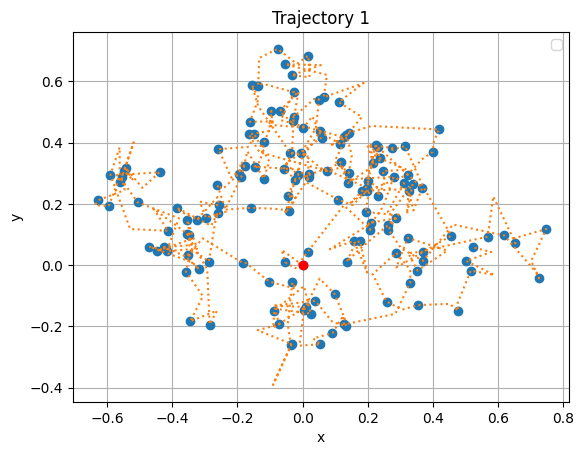

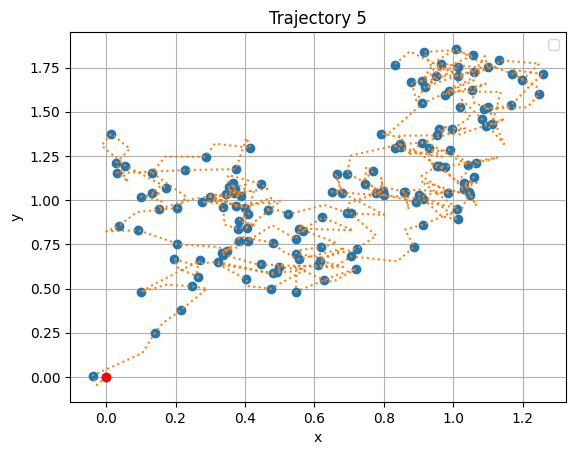

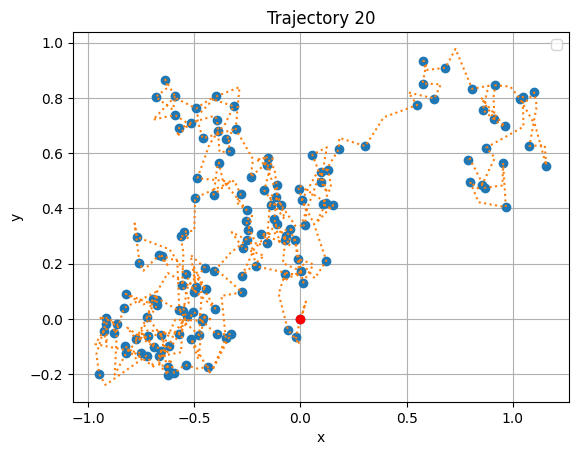

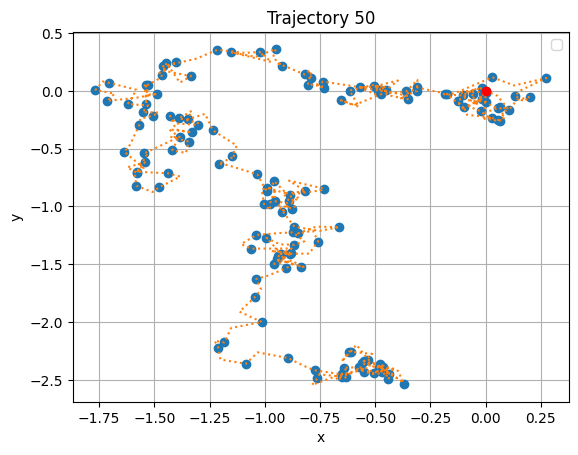

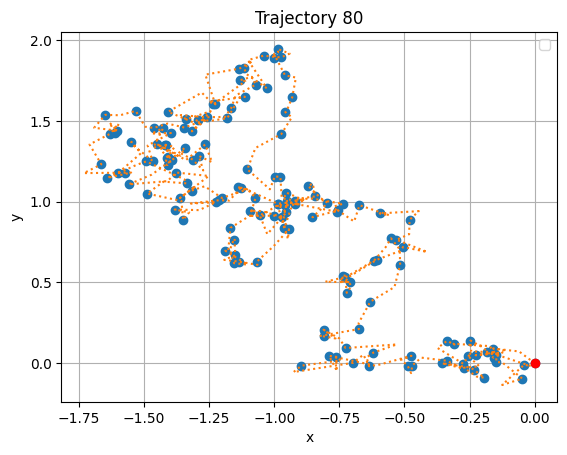

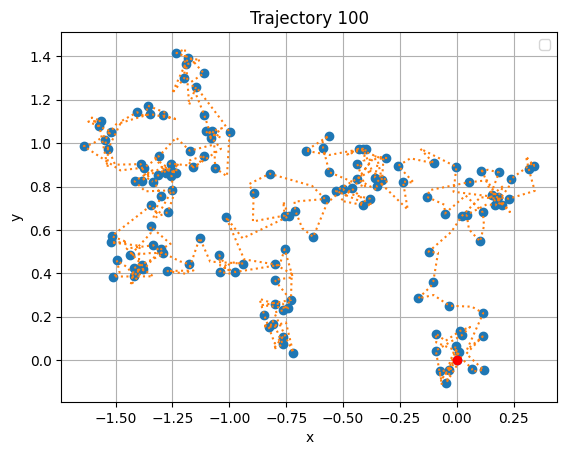

In [77]:
for i, w in enumerate(chosen_traj):
    plt.plot(trajectories_h[w, :, 0], trajectories_h[w, :, 1], 'o')
    plt.plot(trajectories_h_2[w, :, 0], trajectories_h_2[w, :, 1], ':')
    plt.plot(trajectories_h[w, 0, 0], trajectories_h[w, 0, 1], 'o', color="red")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.title(f"Trajectory {w+1}")
    plt.legend()
    plt.show()

In [78]:
trj1 = trajectories_h[chosen_traj, :, :]
diffs = np.diff(trj1, axis=1)
diffs_1 = np.sum(np.abs(diffs), axis=1)
print(diffs_1)

diffs_2 = np.sum(np.abs(diffs)**2, axis=1)
print(diffs_2)

[[10.03309863  9.78856394]
 [11.4563272  10.85043158]
 [10.44244121 11.28946831]
 [11.00860426 10.7133007 ]
 [ 9.90384154 10.51794133]
 [11.58733914 10.87522959]]
[[1.15248534 1.14628393]
 [1.39137738 1.24079353]
 [1.21656992 1.40962264]
 [1.36810367 1.20780203]
 [1.12481967 1.21825506]
 [1.49815418 1.25687849]]


In [79]:
trj2 = trajectories_h_2[chosen_traj, :, :]
diffs = np.diff(trj2, axis=1)
diffs_1 = np.sum(np.abs(diffs), axis=1)
print(diffs_1)

diffs_2 = np.sum(np.abs(diffs)**2, axis=1)
print(diffs_2)

[[13.97932534 14.68322297]
 [15.82420893 15.39302692]
 [14.74009639 15.92605954]
 [15.73071468 15.74468595]
 [14.54543954 14.24917959]
 [15.98782896 15.52274409]]
[[1.15128955 1.14249362]
 [1.38621382 1.28642264]
 [1.26602658 1.40101824]
 [1.35395186 1.35185107]
 [1.22051847 1.15142398]
 [1.4220037  1.38213608]]


In [82]:
P = 1 - chi2(2).cdf(z**2/(sigma**2 * T))
print(P)

0.22730069704883127


In [84]:
count = 0
for tr in trajectories_h:
    x = tr[-1]
    if np.sqrt(x[0]**2 + x[1]**2) > z:
        count += 1
print(count/n)

0.2357142857142857
